In [1]:
!python --version


Python 3.10.16


In [2]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available: 1


In [3]:
import GPUtil

gpus = GPUtil.getGPUs()
for gpu in gpus:
    print(f"GPU Name: {gpu.name}")
    print(f"Total Memory: {gpu.memoryTotal}MB")
    print(f"Used Memory: {gpu.memoryUsed}MB")
    print(f"Free Memory: {gpu.memoryFree}MB")
    print(f"GPU Load: {gpu.load * 100}%")


GPU Name: NVIDIA GeForce GTX 1650
Total Memory: 4096.0MB
Used Memory: 401.0MB
Free Memory: 3537.0MB
GPU Load: 32.0%


In [4]:
import os
from dotenv import load_dotenv


load_dotenv()

# Retrieve values
TRAIN_IMAGE_PATH = os.getenv('TRAIN_IMAGES')
TEST_IMAGE_PATH = os.getenv('TEST_IMAGES')

TRAIN_CSV_PATH = os.getenv('TRAIN_CSV')
TEST_CSV_PATH = os.getenv('TEST_CSV')

PREPROCESSED_TRAINING_PATH = os.getenv('PRE_PROCESSED_TRAIN_IMAGES')
PREPROCESSED_TESTING_PATH = os.getenv('PRE_PROCESSED_TEST_IMAGES')



In [5]:
import pandas as pd

train_df = pd.read_csv(TRAIN_CSV_PATH)
test_df = pd.read_csv(TEST_CSV_PATH)

In [6]:
train_df.head(7)

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0
5,0083ee8054ee,4
6,0097f532ac9f,0


In [7]:
train_df.tail(3)

,id_code,diagnosis
3659,ffcf7b45f213,2
3660,ffd97f8cd5aa,0
3661,ffec9a18a3ce,2


In [8]:
train_df.sample(6)

,id_code,diagnosis
801,39923b29988a,2
842,3ca12e02dd4e,0
1790,7e9458de5707,2
2162,98441214557f,0
57,04579e31e4be,0
1961,8a234d68b27e,3


In [9]:
test_df.head(5)

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


In [10]:
train_images = [os.path.join(TRAIN_IMAGE_PATH, f) for f in os.listdir(TRAIN_IMAGE_PATH) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
test_images = [os.path.join(TEST_IMAGE_PATH, f) for f in os.listdir(TEST_IMAGE_PATH) if f.lower().endswith(('png', 'jpg', 'jpeg'))]


In [11]:
example_train_image = train_images[1]

In [12]:
example_test_image = test_images[10]

In [13]:
total_train_image = len(train_images)
print(total_train_image)

3662


In [14]:
total_test_image = len(test_images)
print(total_test_image)

1928


In [15]:
from PIL import Image

In [16]:
from PIL import Image
import matplotlib.pyplot as plt

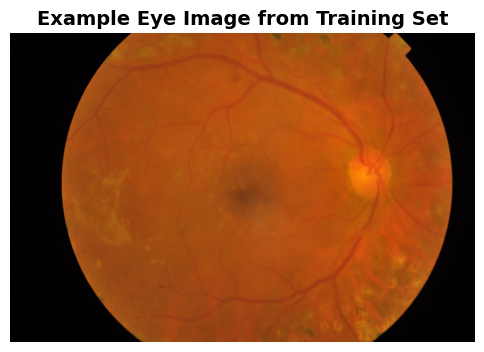

In [17]:
import matplotlib.pyplot as plt
from PIL import Image

# Load and display the image with enhancements
train_img = Image.open(example_train_image)

plt.figure(figsize=(6, 6))  # Set figure size
plt.imshow(train_img)
plt.axis("off")  
plt.title("Example Eye Image from Training Set", fontsize=14, fontweight='bold')  
plt.show()


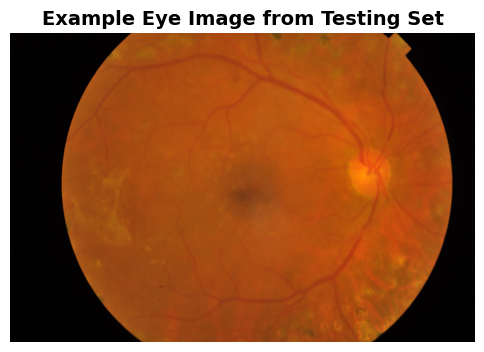

In [18]:
test_img = Image.open(example_test_image)

plt.figure(figsize=(6, 6))  # Set figure size
plt.imshow(train_img)
plt.axis("off")  
plt.title("Example Eye Image from Testing Set", fontsize=14, fontweight='bold')  
plt.show()


In [19]:
import tensorflow as tf
print(tf.__version__)


2.10.1


In [20]:
#Preprocessing of Images

input_folder = TRAIN_IMAGE_PATH
output_folder = PREPROCESSED_TRAINING_PATH

# Ensure output directory exists
os.makedirs(output_folder, exist_ok=True)

dataset = tf.data.Dataset.list_files(os.path.join(input_folder, "*.png"))

def process_and_save_image(path):
    # Read the image
    image = tf.io.read_file(path)
    image = tf.image.decode_png(image, channels=3)  
    
    # Resize the image
    image = tf.image.resize(image, [256, 256])  
    
    # Normalize the image (convert to float and scale between 0 and 1)
    image = tf.cast(image, tf.float32) / 255.0
    
    # Convert back to uint8 for saving
    normalized_image = tf.cast(image * 255, tf.uint8)
    
    # Convert Tensor path to string
    path_str = path.numpy().decode("utf-8")
    
    # Extract only the filename from the path
    filename = os.path.basename(path_str)
    
    # Construct the correct save path (overwriting in the same location)
    save_path = os.path.join(output_folder, filename)
    
    # Save the processed and normalized image
    tf.io.write_file(save_path, tf.image.encode_png(normalized_image))
    
    return tf.constant(0)

# Use tf.py_function and pass the filename correctly
dataset = dataset.map(lambda path: tf.py_function(
    func=process_and_save_image, inp=[path], Tout=[tf.int32]
), num_parallel_calls=tf.data.AUTOTUNE)

# Trigger processing
for _ in dataset:
    pass

print("Processing and normalization complete.")

Processing and normalization complete.


In [21]:
input_folder = TEST_IMAGE_PATH
output_folder = PREPROCESSED_TESTING_PATH

# Ensure output directory exists
os.makedirs(output_folder, exist_ok=True)

dataset = tf.data.Dataset.list_files(os.path.join(input_folder, "*.png"))

def process_and_save_image(path):
    # Read the image
    image = tf.io.read_file(path)
    image = tf.image.decode_png(image, channels=3)  
    
    # Resize the image
    image = tf.image.resize(image, [256, 256])  
    
    # Normalize the image (convert to float and scale between 0 and 1)
    image = tf.cast(image, tf.float32) / 255.0
    
    # Convert back to uint8 for saving
    normalized_image = tf.cast(image * 255, tf.uint8)
    
    # Convert Tensor path to string
    path_str = path.numpy().decode("utf-8")
    
    # Extract only the filename from the path
    filename = os.path.basename(path_str)
    
    # Construct the correct save path (overwriting in the same location)
    save_path = os.path.join(output_folder, filename)
    
    # Save the processed and normalized image
    tf.io.write_file(save_path, tf.image.encode_png(normalized_image))
    
    return tf.constant(0)

# Use tf.py_function and pass the filename correctly
dataset = dataset.map(lambda path: tf.py_function(
    func=process_and_save_image, inp=[path], Tout=[tf.int32]
), num_parallel_calls=tf.data.AUTOTUNE)

# Trigger processing
for _ in dataset:
    pass

print("Processing and normalization complete.")

Processing and normalization complete.


In [22]:
train_df.rename(columns={'id_code': 'image_name', 'diagnosis': 'label'}, inplace=True)
train_df["label"] = train_df["label"].astype(int)


In [23]:
train_df.head(5)

,image_name,label
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [24]:
import tensorflow as tf
import os
import pandas as pd
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [25]:
strategy = tf.distribute.OneDeviceStrategy(device="/GPU:0")

In [26]:
print(PREPROCESSED_TRAINING_PATH)
print(TRAIN_CSV_PATH)

C:\\Users\\HP\\OneDrive\\Desktop\\Projects\\Retinopathy\\PreProcessedImages\\Train
C:\\Users\\HP\\OneDrive\\Desktop\\Projects\\Retinopathy\\train.csv


In [27]:
IMAGE_DIR = PREPROCESSED_TRAINING_PATH  
CSV_FILE = TRAIN_CSV_PATH  
IMG_SIZE = (256, 256)
BATCH_SIZE = 16
AUTOTUNE = tf.data.AUTOTUNE

In [28]:
train_df.head()

,image_name,label
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [29]:
train_df = pd.read_csv(CSV_FILE)
train_df["id_code"] = train_df["id_code"] + ".png"
train_df["diagnosis"] = train_df["diagnosis"].astype(str)  

In [30]:
train_df.head()

,id_code,diagnosis
0,000c1434d8d7.png,2
1,001639a390f0.png,4
2,0024cdab0c1e.png,1
3,002c21358ce6.png,0
4,005b95c28852.png,0


In [31]:
num_classes = len(train_df["diagnosis"].unique())
print(f"Number of classes: {num_classes}")

Number of classes: 5


In [32]:
def load_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, IMG_SIZE)
    image = tf.cast(image, tf.float32) / 127.5 - 1.0
    return image, label

In [33]:
image_paths = [os.path.join(IMAGE_DIR, code) for code in train_df["id_code"].values]
labels = train_df["diagnosis"].astype("int32").values

In [34]:
print(image_paths[:10]) 


['C:\\\\Users\\\\HP\\\\OneDrive\\\\Desktop\\\\Projects\\\\Retinopathy\\\\PreProcessedImages\\\\Train\\000c1434d8d7.png', 'C:\\\\Users\\\\HP\\\\OneDrive\\\\Desktop\\\\Projects\\\\Retinopathy\\\\PreProcessedImages\\\\Train\\001639a390f0.png', 'C:\\\\Users\\\\HP\\\\OneDrive\\\\Desktop\\\\Projects\\\\Retinopathy\\\\PreProcessedImages\\\\Train\\0024cdab0c1e.png', 'C:\\\\Users\\\\HP\\\\OneDrive\\\\Desktop\\\\Projects\\\\Retinopathy\\\\PreProcessedImages\\\\Train\\002c21358ce6.png', 'C:\\\\Users\\\\HP\\\\OneDrive\\\\Desktop\\\\Projects\\\\Retinopathy\\\\PreProcessedImages\\\\Train\\005b95c28852.png', 'C:\\\\Users\\\\HP\\\\OneDrive\\\\Desktop\\\\Projects\\\\Retinopathy\\\\PreProcessedImages\\\\Train\\0083ee8054ee.png', 'C:\\\\Users\\\\HP\\\\OneDrive\\\\Desktop\\\\Projects\\\\Retinopathy\\\\PreProcessedImages\\\\Train\\0097f532ac9f.png', 'C:\\\\Users\\\\HP\\\\OneDrive\\\\Desktop\\\\Projects\\\\Retinopathy\\\\PreProcessedImages\\\\Train\\00a8624548a9.png', 'C:\\\\Users\\\\HP\\\\OneDrive\\\\Deskt

In [35]:
train_df.head()

,id_code,diagnosis
0,000c1434d8d7.png,2
1,001639a390f0.png,4
2,0024cdab0c1e.png,1
3,002c21358ce6.png,0
4,005b95c28852.png,0


In [36]:
train_df['diagnosis'].dtype


dtype('O')

In [40]:
image_paths = [os.path.join(IMAGE_DIR, code) for code in train_df["id_code"].values]
labels = train_df["diagnosis"].astype("int32").values


In [41]:
raw_dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
raw_dataset = raw_dataset.map(load_image, num_parallel_calls=AUTOTUNE)
raw_dataset = raw_dataset.shuffle(len(train_df), seed=42)

In [42]:
train_size = int(0.8 * len(train_df))
train_ds = raw_dataset.take(train_size)
val_ds = raw_dataset.skip(train_size)


In [43]:
train_ds = train_ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
val_ds = val_ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)

In [44]:
train_df.isnull().sum()


id_code      0
diagnosis    0
dtype: int64

In [45]:
train_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [46]:
val_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [47]:
with strategy.scope():
    base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(256, 256, 3))
    
    base_model.trainable = False
    for layer in base_model.layers[:-45]:
        layer.trainable = True
    

    x = GlobalAveragePooling2D()(base_model.output)
    x = BatchNormalization()(x)
    x = Dense(512, activation="relu", kernel_regularizer=l1_l2(l1=1e-6, l2=1e-5))(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation="relu")(x)
    x = Dropout(0.3)(x)
    
    
    output_layer = Dense(num_classes, activation="softmax", dtype='float32')(x)
    model = Model(inputs=base_model.input, outputs=output_layer)
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )


In [48]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [49]:
num_classes = train_df["diagnosis"].nunique()


In [50]:
print(num_classes)

5


In [51]:
early_stopping = EarlyStopping(
    monitor="val_accuracy", 
    patience=7,
    restore_best_weights=True
)

In [52]:
reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",  
    factor=0.2,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

In [53]:
checkpoint = ModelCheckpoint(
    "best_model.h5",
    save_best_only=True,
    monitor="val_accuracy"
)

In [54]:
len(val_ds)

46

In [55]:
for batch in val_ds.take(1):
    print(batch)



(<tf.Tensor: shape=(16, 256, 256, 3), dtype=float32, numpy=
array([[[[-0.9764706 , -0.99215686, -0.9843137 ],
         [-0.9764706 , -0.99215686, -0.9843137 ],
         [-0.9764706 , -0.99215686, -0.9843137 ],
         ...,
         [-0.9764706 , -0.99215686, -0.9843137 ],
         [-0.9764706 , -0.99215686, -0.9843137 ],
         [-0.9764706 , -0.99215686, -0.9843137 ]],

        [[-0.9764706 , -0.99215686, -0.9843137 ],
         [-0.9764706 , -0.99215686, -0.9843137 ],
         [-0.9764706 , -0.99215686, -0.9843137 ],
         ...,
         [-0.9764706 , -0.99215686, -0.9843137 ],
         [-0.9764706 , -0.99215686, -0.9843137 ],
         [-0.9764706 , -0.99215686, -0.9843137 ]],

        [[-0.9764706 , -0.99215686, -0.9843137 ],
         [-0.9764706 , -0.99215686, -0.9843137 ],
         [-0.9764706 , -0.99215686, -0.9843137 ],
         ...,
         [-0.9764706 , -0.99215686, -0.9843137 ],
         [-0.9843137 , -0.9843137 , -0.9843137 ],
         [-0.9843137 , -0.9843137 , -0.98431

In [56]:
callbacks = [early_stopping, checkpoint, reduce_lr]

In [57]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/30
184/184 [==============================] - 90s 399ms/step - loss: 1.0648 - accuracy: 0.6528 - val_loss: 18.0306 - val_accuracy: 0.4993 - lr: 1.0000e-04
Epoch 2/30
184/184 [==============================] - 72s 371ms/step - loss: 0.8135 - accuracy: 0.7279 - val_loss: 5.1631 - val_accuracy: 0.5034 - lr: 1.0000e-04
Epoch 3/30
184/184 [==============================] - 71s 375ms/step - loss: 0.6874 - accuracy: 0.7631 - val_loss: 3.3643 - val_accuracy: 0.5225 - lr: 1.0000e-04
Epoch 4/30
184/184 [==============================] - 72s 374ms/step - loss: 0.6580 - accuracy: 0.7695 - val_loss: 1.5468 - val_accuracy: 0.6398 - lr: 1.0000e-04
Epoch 5/30
184/184 [==============================] - 72s 374ms/step - loss: 0.5764 - accuracy: 0.7856 - val_loss: 0.6801 - val_accuracy: 0.7708 - lr: 1.0000e-04
Epoch 6/30
184/184 [==============================] - 73s 377ms/step - loss: 0.5227 - accuracy: 0.8170 - val_loss: 0.4556 - val_accuracy: 0.8377 - lr: 1.0000e-04
Epoch 7/30
184/184 [=======

In [83]:
CSV_FILE = TEST_CSV_PATH


test_df = pd.read_csv(CSV_FILE)
test_df["id_code"] = test_df["id_code"] + ".png"

In [84]:
test_df.head()

,id_code
0,0005cfc8afb6.png
1,003f0afdcd15.png
2,006efc72b638.png
3,00836aaacf06.png
4,009245722fa4.png


In [85]:
test_image_paths = [os.path.join(PREPROCESSED_TESTING_PATH, code) for code in test_df["id_code"].values]
test_labels = [-1] * len(test_df) 

test_dataset = tf.data.Dataset.from_tensor_slices((test_image_paths, test_labels))
test_dataset = test_dataset.map(load_image, num_parallel_calls=AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(AUTOTUNE)


In [86]:
def load_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, [256, 256])  
    image = image / 255.0  
    return image, label


In [87]:
test_df.head(4)

,id_code
0,0005cfc8afb6.png
1,003f0afdcd15.png
2,006efc72b638.png
3,00836aaacf06.png


In [89]:
import numpy as np

In [90]:
predictions = model.predict(test_dataset)
predicted_classes = np.argmax(predictions, axis=1)


121/121 [==============================] - 13s 105ms/step


1/1 [==============================] - 0s 102ms/step


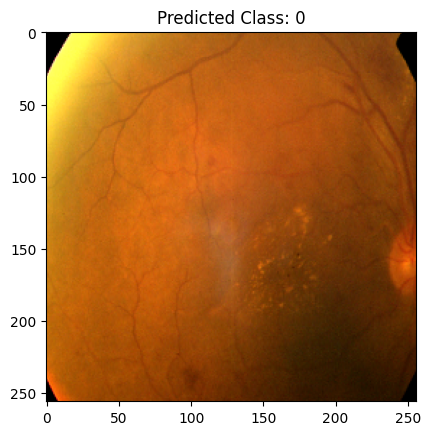

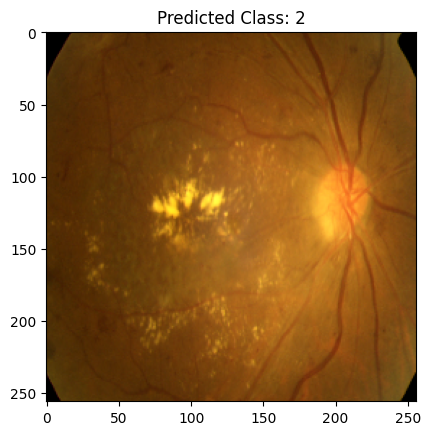

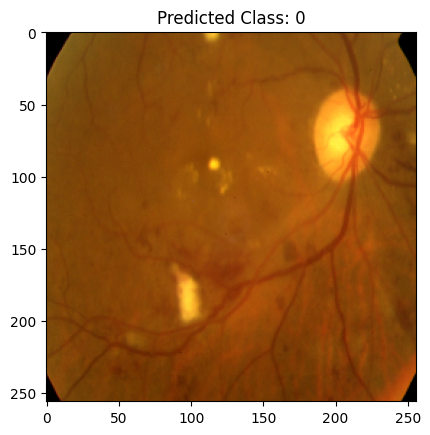

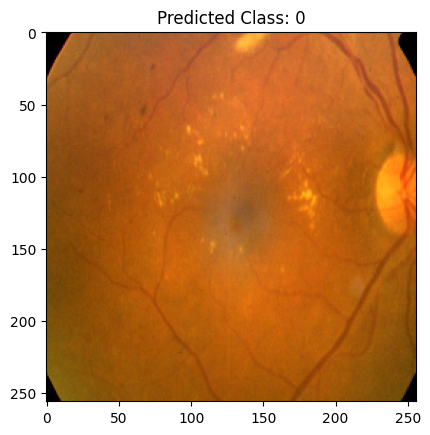

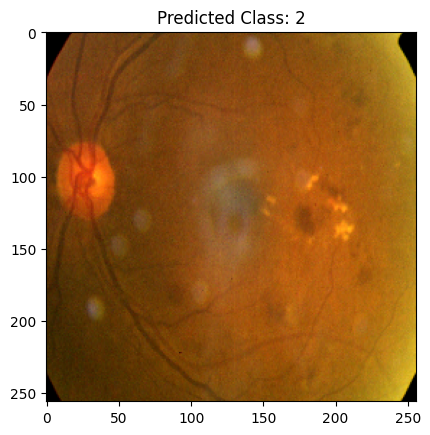

In [92]:
image_batch, _ = next(iter(test_dataset))  


predictions = model.predict(image_batch)
predicted_classes = np.argmax(predictions, axis=1)

# Display a few images and their predictions
num_images_to_display = 5
for i in range(num_images_to_display):
    plt.imshow(image_batch[i])  
    plt.title(f"Predicted Class: {predicted_classes[i]}")
    plt.show()


In [108]:
print("Available keys in history:", history.keys())

Available keys in history: dict_keys([])


Could not find accuracy metrics in history. Available keys: dict_keys([])


C:\Users\HP\AppData\Local\Temp\ipykernel_15456\4010809865.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


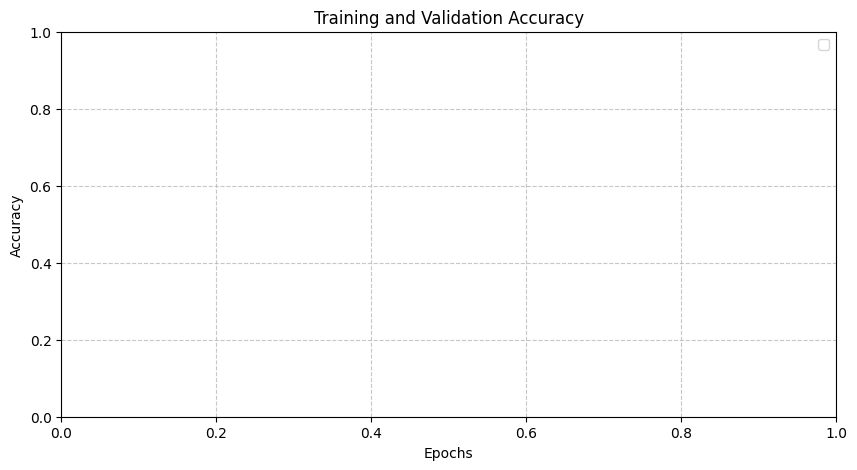

Could not find loss metrics in history. Available keys: dict_keys([])


<Figure size 1000x500 with 0 Axes>

In [109]:
plt.figure(figsize=(10, 5))

# Use try/except to handle potential key differences
try:
    # Try standard key names first
    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy', linestyle='--')
except KeyError:
    # Fall back to older naming convention if necessary
    try:
        plt.plot(history['acc'], label='Training Accuracy') 
        plt.plot(history['val_acc'], label='Validation Accuracy', linestyle='--')
    except KeyError:
        print("Could not find accuracy metrics in history. Available keys:", history.keys())

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
try:
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss', linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
except KeyError:
    print("Could not find loss metrics in history. Available keys:", history.keys())

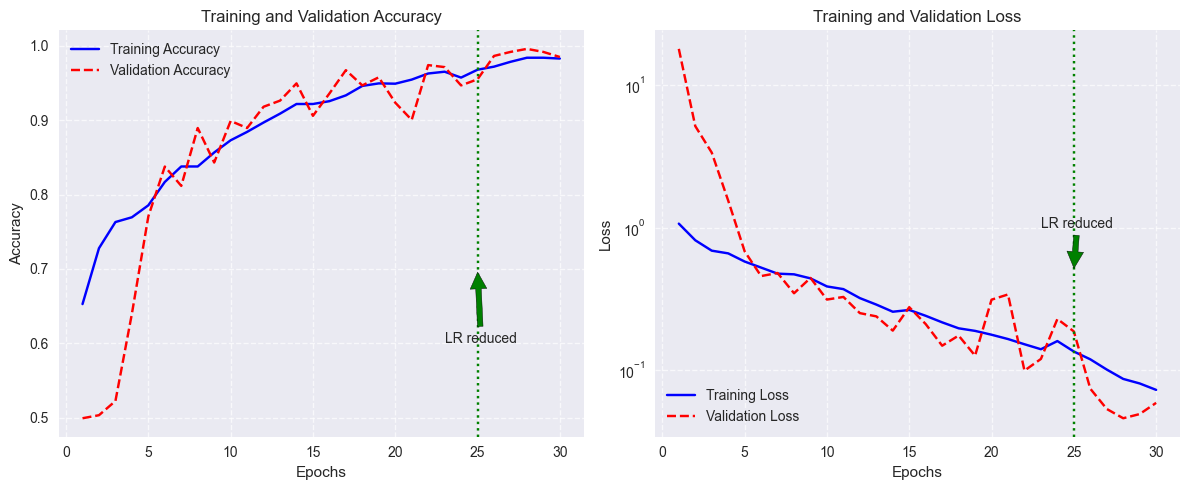

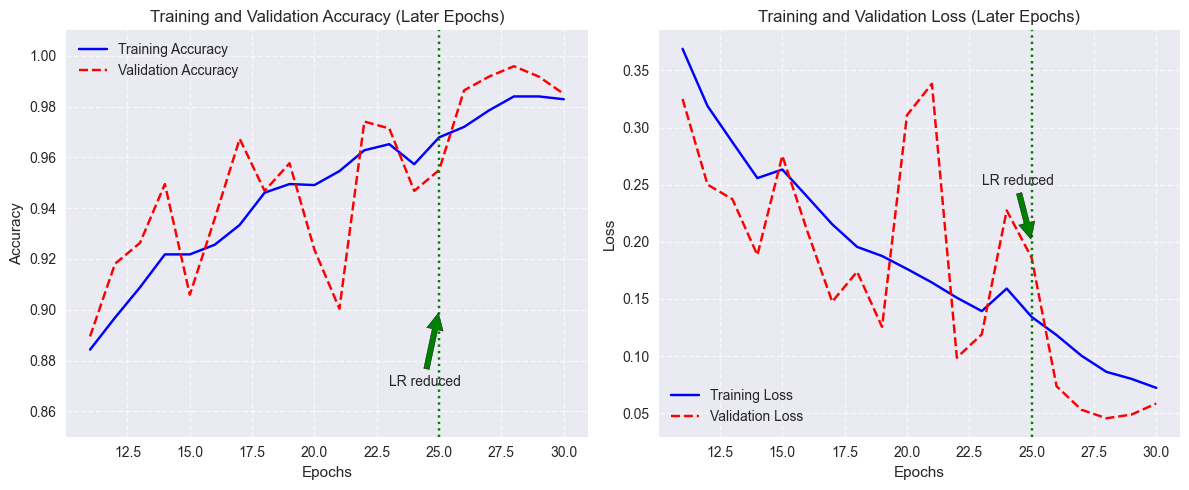

In [110]:
import matplotlib.pyplot as plt
import numpy as np

# Extract training metrics from the logs
epochs = np.arange(1, 31)
train_loss = [1.0648, 0.8135, 0.6874, 0.6580, 0.5764, 0.5227, 0.4739, 0.4687, 0.4390, 0.3853,
              0.3689, 0.3189, 0.2872, 0.2558, 0.2633, 0.2395, 0.2154, 0.1956, 0.1876, 0.1763,
              0.1644, 0.1511, 0.1394, 0.1591, 0.1343, 0.1184, 0.1003, 0.0862, 0.0801, 0.0722]

val_loss = [18.0306, 5.1631, 3.3643, 1.5468, 0.6801, 0.4556, 0.4789, 0.3450, 0.4421, 0.3115,
            0.3250, 0.2501, 0.2373, 0.1884, 0.2754, 0.2095, 0.1476, 0.1739, 0.1256, 0.3109,
            0.3384, 0.0986, 0.1191, 0.2275, 0.1860, 0.0736, 0.0530, 0.0456, 0.0488, 0.0585]

train_acc = [0.6528, 0.7279, 0.7631, 0.7695, 0.7856, 0.8170, 0.8378, 0.8378, 0.8566, 0.8730,
             0.8843, 0.8969, 0.9088, 0.9218, 0.9218, 0.9256, 0.9334, 0.9461, 0.9495, 0.9491,
             0.9546, 0.9628, 0.9652, 0.9573, 0.9679, 0.9720, 0.9785, 0.9840, 0.9840, 0.9829]

val_acc = [0.4993, 0.5034, 0.5225, 0.6398, 0.7708, 0.8377, 0.8117, 0.8895, 0.8431, 0.8990,
           0.8895, 0.9181, 0.9263, 0.9495, 0.9059, 0.9359, 0.9673, 0.9468, 0.9577, 0.9236,
           0.9004, 0.9741, 0.9714, 0.9468, 0.9550, 0.9864, 0.9918, 0.9959, 0.9918, 0.9850]

# Set style for better visuals
plt.style.use('seaborn-v0_8')

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r--', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Highlight learning rate change
plt.axvline(x=25, color='green', linestyle=':', label='LR reduced')
plt.annotate('LR reduced', xy=(25, 0.7), xytext=(23, 0.6),
             arrowprops=dict(facecolor='green', shrink=0.05))

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r--', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Use log scale for loss plot to better visualize the high initial validation loss
plt.yscale('log')

# Highlight learning rate change
plt.axvline(x=25, color='green', linestyle=':', label='LR reduced')
plt.annotate('LR reduced', xy=(25, 0.5), xytext=(23, 1),
             arrowprops=dict(facecolor='green', shrink=0.05))

plt.tight_layout()
plt.show()

# Plot focused on the later epochs (after stabilization)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs[10:], train_acc[10:], 'b-', label='Training Accuracy')
plt.plot(epochs[10:], val_acc[10:], 'r--', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (Later Epochs)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0.85, 1.01)

# Highlight learning rate change
plt.axvline(x=25, color='green', linestyle=':', label='LR reduced')
plt.annotate('LR reduced', xy=(25, 0.9), xytext=(23, 0.87),
             arrowprops=dict(facecolor='green', shrink=0.05))

# Plot loss for later epochs
plt.subplot(1, 2, 2)
plt.plot(epochs[10:], train_loss[10:], 'b-', label='Training Loss')
plt.plot(epochs[10:], val_loss[10:], 'r--', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Later Epochs)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Highlight learning rate change
plt.axvline(x=25, color='green', linestyle=':', label='LR reduced')
plt.annotate('LR reduced', xy=(25, 0.2), xytext=(23, 0.25),
             arrowprops=dict(facecolor='green', shrink=0.05))

plt.tight_layout()
plt.show()